<a href="https://colab.research.google.com/github/gunjantoora/gunjantoora/blob/main/Customer%20Satisfaction%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading

In [ ]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd


from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#from google.colab import files
#uploaded = files.upload() 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import io
#df = pd.read_csv(io.BytesIO(uploaded['Airline_train.csv']))
#print (df)
dataset = pd.read_csv('/content/Airline_train.csv')
print (dataset)


        Unnamed: 0      id  ... Arrival Delay in Minutes             satisfaction
0                0   70172  ...                     18.0  neutral or dissatisfied
1                1    5047  ...                      6.0  neutral or dissatisfied
2                2  110028  ...                      0.0                satisfied
3                3   24026  ...                      9.0  neutral or dissatisfied
4                4  119299  ...                      0.0                satisfied
...            ...     ...  ...                      ...                      ...
103899      103899   94171  ...                      0.0  neutral or dissatisfied
103900      103900   73097  ...                      0.0                satisfied
103901      103901   68825  ...                     14.0  neutral or dissatisfied
103902      103902   54173  ...                      0.0  neutral or dissatisfied
103903      103903   62567  ...                      0.0  neutral or dissatisfied

[103904 rows x 

In [ ]:
dataset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
dataset = pd.get_dummies(dataset, columns=['Gender','Type of Travel','Class','Customer Type','satisfaction',])
dataset['Arrival Delay in Minutes'] = dataset['Arrival Delay in Minutes'].fillna(0)
dataset = dataset.replace(r'^\s*$', np.nan, regex=True)

# Data Exploration


In [ ]:
print(dataset.head())
print(dataset.columns)
#print(dataset.groupby('satisfaction').size())
dataset.info()
print (dataset)

   Unnamed: 0  ...  satisfaction_satisfied
0           0  ...                       0
1           1  ...                       0
2           2  ...                       1
3           3  ...                       0
4           4  ...                       1

[5 rows x 31 columns]
Index(['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Female', 'Gender_Male', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer',
       'satisfaction_neutral or

In [ ]:
dataset.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Customer Type_Loyal Customer,Customer Type_disloyal Customer,satisfaction_neutral or dissatisfied,satisfaction_satisfied
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392,0.507459,0.492541,0.689627,0.310373,0.477989,0.449886,0.072124,0.817322,0.182678,0.566667,0.433333
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776,0.499947,0.499947,0.462649,0.462649,0.499518,0.497485,0.258695,0.386404,0.386404,0.495538,0.495538
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#visual data exploration

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(dataset['satisfaction_satisfied'])


f = plt.figure(figsize=(20,4))
f.add_subplot(1,4,1)
dataset['Type of Travel_Business travel'].value_counts().plot(kind='bar', color='red', title='Business travel?')
f.add_subplot(1,4,2)
dataset['Gender_Female'].value_counts().plot(kind='bar', color='pink',title='Gender= Female?')

f.add_subplot(1,4,3)
dataset['Class_Business'].value_counts().plot(kind='bar', color='blue', title='business class travel?' )   

f.add_subplot(1,4,4)
dataset['Customer Type_Loyal Customer'].value_counts().plot(kind='bar', color='green', title='loyal customer?' )   

### Check for the nature of dataset - balanced or imbalanced


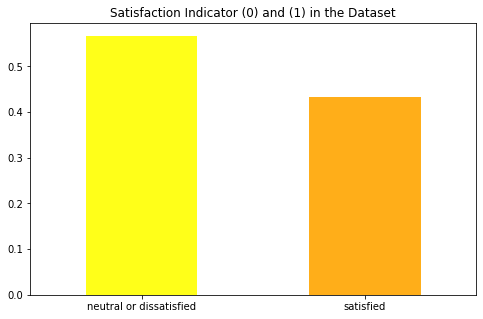

In [ ]:
df = pd.read_csv(r'/content/Airline_train.csv')
fig = plt.figure(figsize = (8,5))
df.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['yellow','orange'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()



The above plot shows a distribution of around 55:45 between neutral/dissatisfied passengers and satisfied passengers respectively. 


# Exploratory Data Analysis


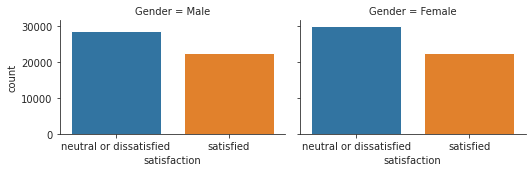

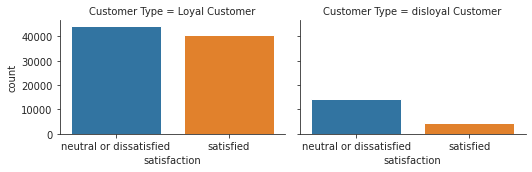

In [ ]:

dataset = pd.read_csv(r'/content/Airline_train.csv')


# Gender and Customer type
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=dataset, kind="count", height=2.5, aspect=1.5)  
    g = sns.catplot("satisfaction", col="Customer Type", col_wrap=2, data=dataset, kind="count", height=2.5, aspect=1.5)

Gender:
According to the above observation, the plot depicts a similarity between the gender distribution of nuetral/dissatisfied customers and satisfied customers. the number of nuetral/dissatisfied customers is exceeding than the number of satified customers when male and female passengers are taken into accountability.

Customer Type:
With regards to the customer type, the loyal passengers also exhibit a ratio of 49:51 for satisfied versus nuetral/dissatisfied.

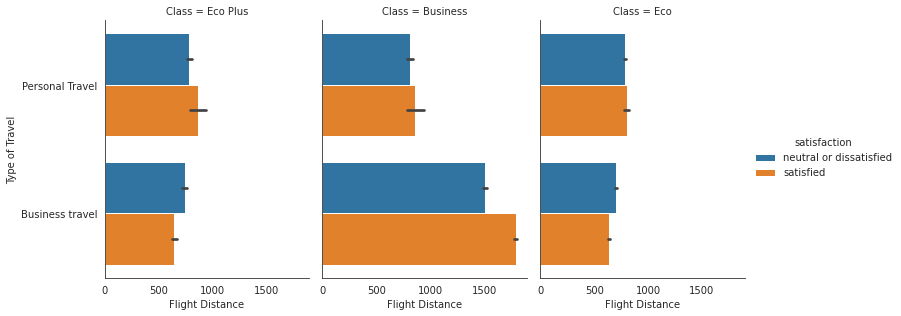

In [ ]:
# Type_of_Travel and Flight_Distance by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=dataset, kind="bar", height=4.5, aspect=.8)

Type of Travel and Flight Distance grouped by Class:


Specifically for business travel from the business class category, count for satisfied passengers are larger in the case of longer flight distance. In terms of personal travel from eco, eco plus, business classes the distribution of satisfied and dissatisfied passengers is at equilibrium state.

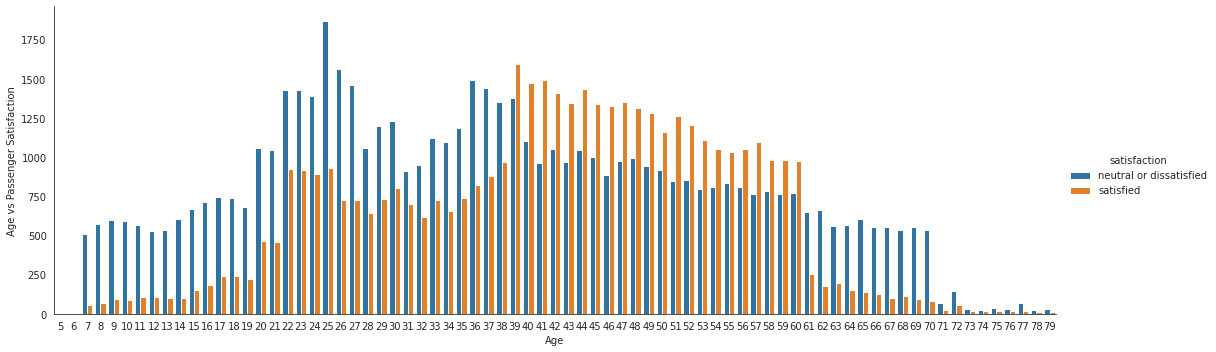

In [ ]:
# Age
with sns.axes_style('white'):
    g = sns.catplot("Age", data=dataset, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

In [ ]:
# Age
with sns.axes_style('white'):
    g = sns.catplot("Age", data=dataset, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

For Age Vs Passenger Satisfaction:


From age 7-to-38 and from age 61-to-79, the number of neutral/dissatisfied passengers is very high compared to satisfied passengers. On the other hand, in age group 39-60, the number of satisfied passengers is higher compared to neutral/dissatisfied passengers.

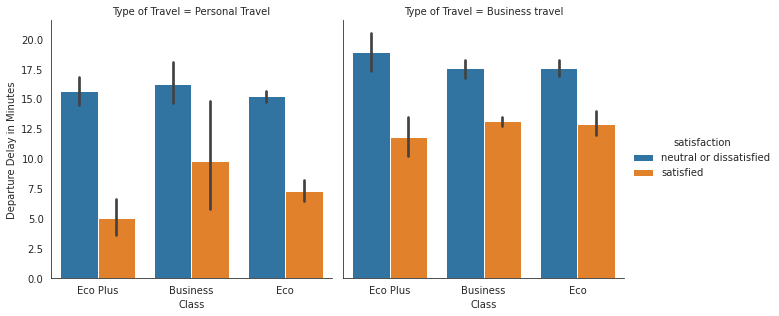

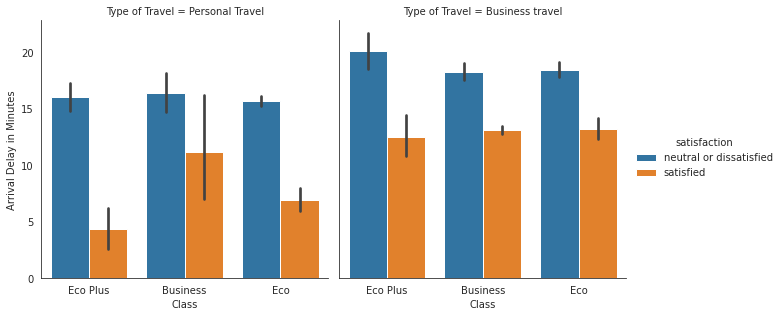

In [ ]:
# Departure_Delay and Arrival Delay by Type_of_Travel
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=dataset, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=dataset, kind="bar", height=4.5, aspect=1.0)

Departure Delay, Arrival Delay Vs. Type of Travel:

Specifically for classes Eco, Eco Plus, in case of personal travel the number of nuetral/dissatisfied passenger are comparitively high when arrival in delay is high. Deriving from the plot, the combinations have high number of nuetral/dissatisfied passengers compared to the total number of satisfied passengers. 

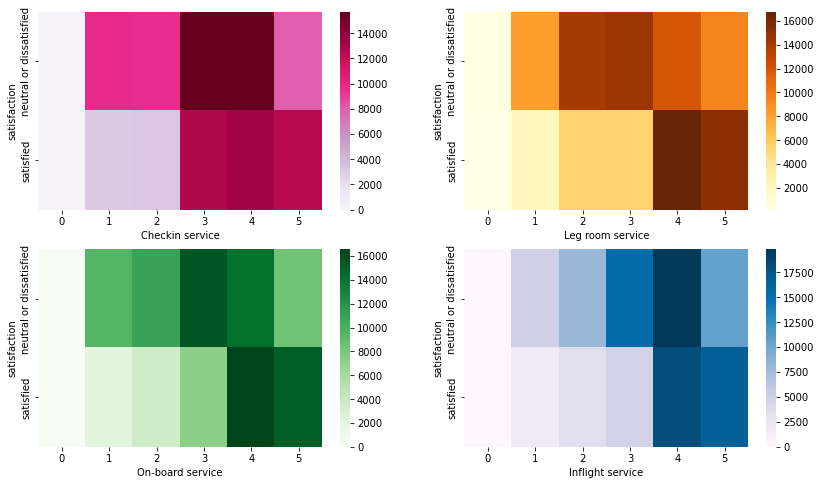

In [ ]:
# Checkin service, Leg_room service, On-board service and Inflight service

fig, axarr = plt.subplots(2, 2, figsize=(14, 8))

table1 = pd.crosstab(dataset['satisfaction'], dataset['Checkin service'])
sns.heatmap(table1, cmap='PuRd', ax = axarr[0][0])
table2 = pd.crosstab(dataset['satisfaction'], dataset['Leg room service'])
sns.heatmap(table2, cmap='YlOrBr', ax = axarr[0][1])
table3 = pd.crosstab(dataset['satisfaction'], dataset['On-board service'])
sns.heatmap(table3, cmap='Greens', ax = axarr[1][0])
table4 = pd.crosstab(dataset['satisfaction'], dataset['Inflight service'])
sns.heatmap(table4, cmap='PuBu', ax = axarr[1][1])

Checkin Service, Leg-room Service, On-board Service and Inflight Service:
For Leg-Room Service, On-board Service and InflightService, the passengers who give 4 and 5 rating belong to satisfied passengers category. For checkin services, the passengers who gave 0-2 rating are majorly neutral/dissatisfied. 

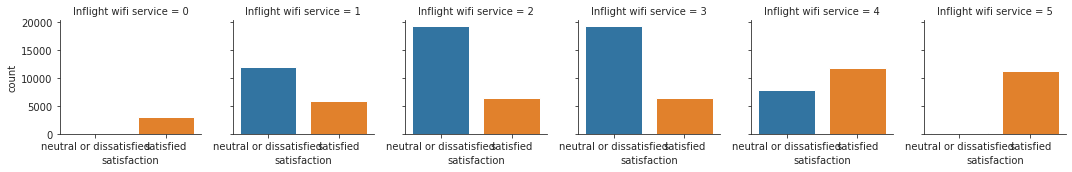

In [ ]:
# Inflight wifi service group by satisfaction
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Inflight wifi service", col_wrap=6, data=dataset, kind="count", height=2.5, aspect=1)

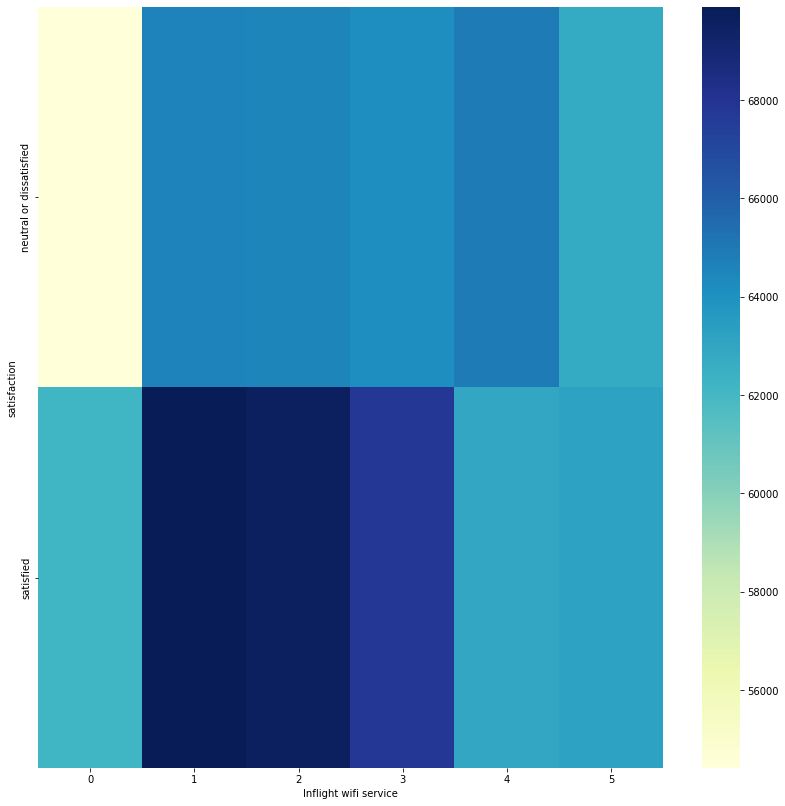

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/Airline_train.csv')

df = dataset[['Inflight wifi service', 'satisfaction','id' ]]
heatmap = pd.pivot_table(df, values='id', 
                     index=['satisfaction'], 
                     columns='Inflight wifi service')
fig, axarr = plt.subplots(1, 1, figsize=(14, 14))

sns.heatmap(heatmap, cmap="YlGnBu")



Comparing departure and arrival times with satisfaction based on make  up time in the air.

In [ ]:
Dep = dataset['Departure Delay in Minutes'] > 120
print('Departure delays over 120: ', sum(Dep))

Arr = dataset['Arrival Delay in Minutes'] > 120
print('Arrival delays over 120: ', sum(Arr))

Arr2 = dataset['Arrival Delay in Minutes'] < 0
print('Arrival delays under 0: ', sum(Arr2))
import numpy as np

SAT=np.sum((dataset['Departure Delay in Minutes'] > 30) & (dataset['Arrival Delay in Minutes'] < 5) & (dataset['satisfaction_satisfied'] == 1))
print('Satisfied with make up time(30): ', SAT)
UNSAT=np.sum((dataset['Departure Delay in Minutes'] > 30) & (dataset['Arrival Delay in Minutes'] < 5) & (dataset['satisfaction_satisfied'] == 0))
print('NOT satisfied with make up time(30): ', UNSAT)

SAT2=np.sum((dataset['Departure Delay in Minutes'] > 30) & (dataset['Arrival Delay in Minutes'] > 30) & (dataset['satisfaction_satisfied'] == 1))
print('Satisfied with NO make up time(30): ', SAT2)
UNSAT2=np.sum((dataset['Departure Delay in Minutes'] > 30) & (dataset['Arrival Delay in Minutes'] > 30) & (dataset['satisfaction_satisfied'] == 0))
print('NOT satisfied with NO make up time(30): ', UNSAT2)

SAT3=np.sum((dataset['Departure Delay in Minutes'] > 120) & (dataset['Arrival Delay in Minutes'] < 30) & (dataset['satisfaction_satisfied'] == 1))
print('Satisfied with make up time(120): ', SAT3)
UNSAT3=np.sum((dataset['Departure Delay in Minutes'] > 120) & (dataset['Arrival Delay in Minutes'] < 30) & (dataset['satisfaction_satisfied'] == 0))
print('NOT satisfied with make up time(120): ', UNSAT3)

SAT4=np.sum((dataset['Departure Delay in Minutes'] > 120) & (dataset['Arrival Delay in Minutes'] > 100) & (dataset['satisfaction_satisfied'] == 1))
print('Satisfied with NO make up time(120): ', SAT4)
UNSAT4=np.sum((dataset['Departure Delay in Minutes'] > 120) & (dataset['Arrival Delay in Minutes'] > 100) & (dataset['satisfaction_satisfied'] == 0))
print('NOT satisfied with NO make up time(120): ', UNSAT4)

min30 = SAT/UNSAT
print('30 sat rate', min30)
min30B = SAT2/UNSAT2
print('30 unsat rate', min30B)
min120 = SAT3/UNSAT3
print('120 sat rate', min120)
min120B = SAT4/UNSAT4
print('120 unsat rate', min120B)

#Corelation Analysis

Correlation Heatmap - Finding Correlation amoung features

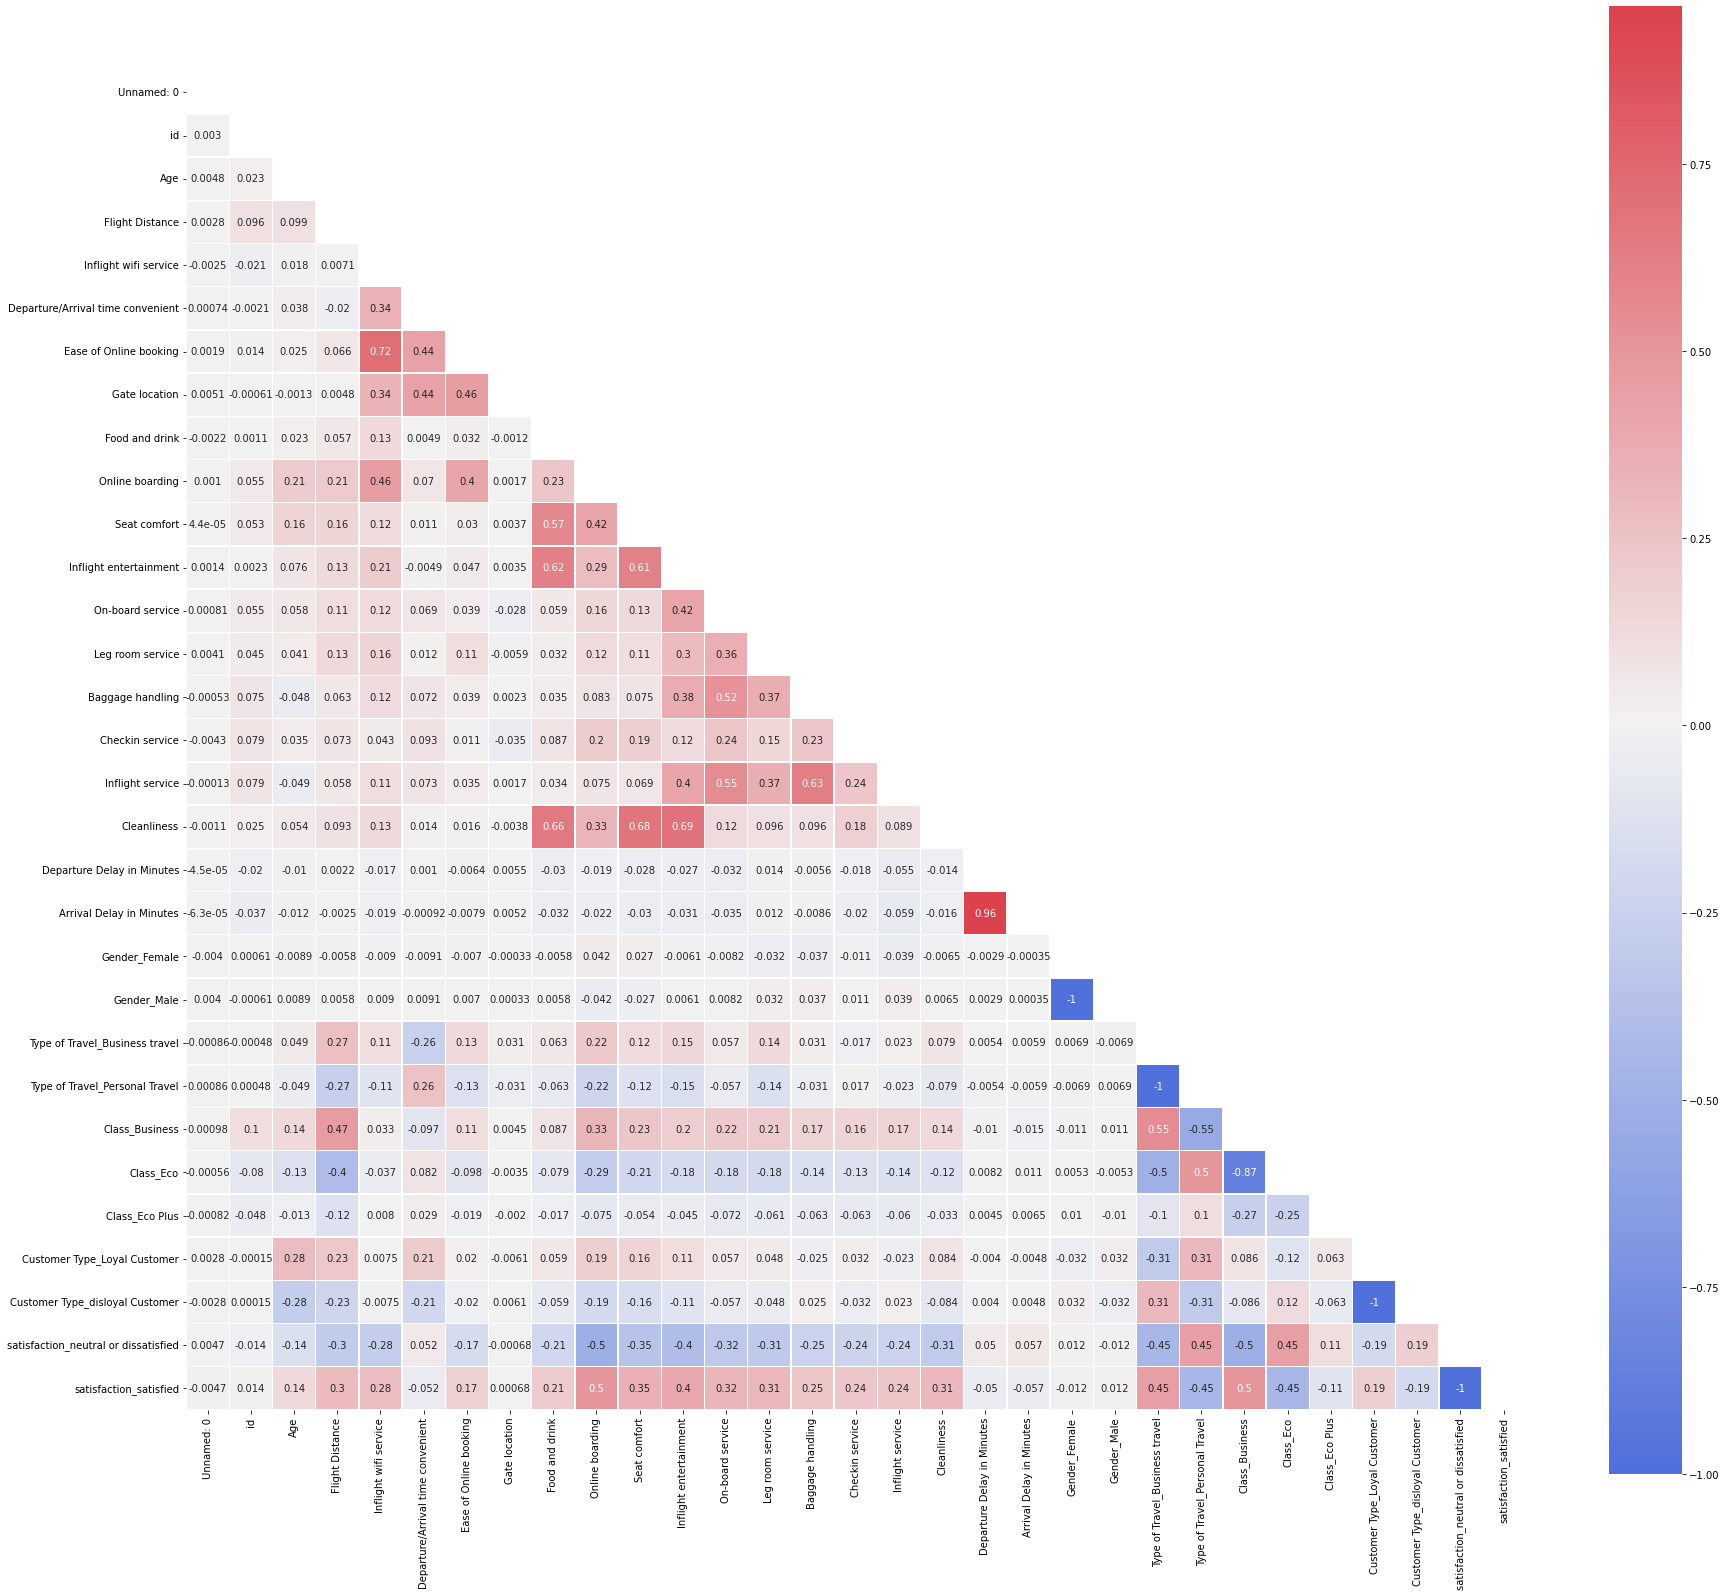

In [ ]:
import seaborn as sns

corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

Highly Correlated Variables:


1.Inflight service - Baggage handling


2.Ease of Online booking - Inflight wifi service.


There are no variables as a pair having a correlation coefficient equating to 1. Therefore there is no perfect multi-collinearity. Hence discarding of variable is not being considered. 

## Top 10 features using Chi-Square

In [ ]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2


dataset = pd.read_csv(r'/content/Airline_train.csv')


dataset = pd.get_dummies(dataset, columns=['Gender','Type of Travel','Class','Customer Type','satisfaction',])
dataset['Arrival Delay in Minutes'] = dataset['Arrival Delay in Minutes'].fillna(0)
dataset = dataset.replace(r'^\s*$', np.nan, regex=True)

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(dataset)
modified_data = pd.DataFrame(r_scaler.transform(dataset), columns=dataset.columns)
modified_data.head()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Customer Type_Loyal Customer,Customer Type_disloyal Customer,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,0.000000,0.540280,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.000010,0.038852,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.000019,0.847150,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.000029,0.184980,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.000038,0.918532,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
X = modified_data.loc[:,modified_data.columns!='satisfaction',]
y = modified_data[['satisfaction_neutral or dissatisfied', 'satisfaction_satisfied']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Flight Distance', 'Online boarding', 'Inflight entertainment',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Class_Business', 'Class_Eco', 'Customer Type_disloyal Customer',
       'satisfaction_neutral or dissatisfied', 'satisfaction_satisfied'],
      dtype='object')


# Importance of feature using Wrapper Method & random forest

combinations of features against the evaluation criterion

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.feature_selection import SelectFromModel


dataset = pd.read_csv(r'/content/Airline_train.csv')



dataset = pd.get_dummies(dataset, columns=['Gender','Type of Travel','Class','Customer Type',])
dataset['Arrival Delay in Minutes'] = dataset['Arrival Delay in Minutes'].fillna(0)
dataset = dataset.replace(r'^\s*$', np.nan, regex=True)

X = dataset.drop('satisfaction', axis=1)
y = dataset['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Inflight wifi service', 'Ease of Online booking', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Type of Travel_Business travel', 'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco']
[0.0151738  0.02685579 0.02387509 0.02248365 0.134982   0.01351311
 0.03577382 0.01242073 0.00918903 0.15735672 0.04269181 0.05598994
 0.02595038 0.03018937 0.02357042 0.02232596 0.02018827 0.02490604
 0.00824357 0.0094792  0.00235559 0.00253372 0.05405539 0.06353724
 0.05967585 0.04791231 0.00226947 0.02741593 0.02508579]


'Inflight wifi service', 'Ease of Online booking', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Type of Travel_Business travel', 'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco'
These features are inherently important in contributing towards the customer or passenger satisfaction. 

# Feature Permutation with random forest

In [ ]:
!pip install eli5

import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier as rf


perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

     |████████████████████████████████| 106 kB 26.7 MB/s 


Weight,Feature
0.1435 ± 0.0015,Inflight wifi service
0.0433 ± 0.0011,Online boarding
0.0312 ± 0.0005,Type of Travel_Personal Travel
0.0308 ± 0.0006,Baggage handling
0.0301 ± 0.0008,Checkin service
0.0239 ± 0.0008,Seat comfort
0.0238 ± 0.0005,Inflight service
0.0188 ± 0.0007,Cleanliness
0.0130 ± 0.0006,id
0.0098 ± 0.0001,Class_Business


Most Important Features:
Inflight wifi service, Online boarding, Type of Travel_Personal Travel, Baggage handling





#Train vaidation split and test data


In [ ]:
#Splitting training data into training and valdation---

array = dataset.values
X = array[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]]
Y = array[:,30]

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)



In [ ]:
#----The unseen test data---

dataset_test = pd.read_csv('/content/Airline_test.csv') #select the test file
dataset_test.tail()

#cleaning
dataset_test = pd.get_dummies(dataset_test, columns=['Gender','Type of Travel','Class','Customer Type','satisfaction'])
dataset_test['Arrival Delay in Minutes'] = dataset_test['Arrival Delay in Minutes'].fillna(0)
dataset_test = dataset_test.replace(r'^\s*$', np.nan, regex=True)

dataset_test.head()
array2 = dataset_test.values


X_test = array2[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]]
Y_test_actual = array2[:,30]

#Another option- Data resampling for having equal number of satisfied and dissatisfied data

AKA Downsampling
This will also make our models run faster

In [ ]:
dataset2 = pd.read_csv('/content/Airline_train.csv')
dataset2 = pd.get_dummies(dataset2, columns=['satisfaction',])
dataset2['Arrival Delay in Minutes'] = dataset2['Arrival Delay in Minutes'].fillna(0)
dataset2 = dataset2.replace(r'^\s*$', np.nan, regex=True)

dataset_satisfied= dataset2[dataset2['satisfaction_satisfied']==1]
dataset_dissatisfied= dataset2[dataset2['satisfaction_satisfied']==0]

from sklearn.utils import resample
dataset_satisfied_down= resample(dataset_satisfied, replace=False, n_samples=5000, random_state=42)
dataset_dissatisfied_down= resample(dataset_dissatisfied, replace=False, n_samples=5000, random_state=42)

dataset_down= pd.concat([dataset_satisfied_down, dataset_dissatisfied_down ])
len(dataset_down)

10000

In [ ]:
X= dataset_down.drop('satisfaction_satisfied',axis=1).copy()
y= dataset_down['satisfaction_satisfied'].copy()

# one hot encoding--- as SVM doesnt support categorical data

X_encoded = pd.get_dummies(X, columns=['Gender','Type of Travel','Class','Customer Type'])

In [ ]:
X_train_d, X_validation_d, Y_train_d, Y_validation_d= model_selection.train_test_split (X_encoded, y, random_state=42)

#scaling X data
from sklearn import preprocessing
X_train_scaled= X_train_d
X_validation_scaled= X_validation_d


#final train validation split:
# X_train_scaled,  X_validation_d, X_validation_scaled, Y_validation_d

In [ ]:
#Unseen test data---------

dataset3= pd.read_csv('/content/Airline_test.csv')
dataset3 = pd.get_dummies(dataset3, columns=['satisfaction',])
dataset3['Arrival Delay in Minutes'] = dataset3['Arrival Delay in Minutes'].fillna(0)
dataset3 = dataset3.replace(r'^\s*$', np.nan, regex=True)

dataset3.columns
X_test= dataset_down.drop('satisfaction_satisfied',axis=1).copy()
y_test= dataset_down['satisfaction_satisfied'].copy()

# one hot encoding--- as SVM doesnt support categorical data

X_test_encoded = pd.get_dummies(X_test, columns=['Gender','Type of Travel','Class','Customer Type'])

#final X_test_encoded, y_test

In [ ]:
#X_test_d = array2[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
#Y_test_actual_d = array2[:,25]

#All models


In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs',max_iter=500)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.860363 (0.006840)
LDA: 0.871407 (0.001715)
KNN: 0.742803 (0.003194)
CART: 0.944023 (0.001345)
NB: 0.848598 (0.003011)


#Logistic Regerssion

In [ ]:
##------------logistic regression-----------##
# Test options and evaluation metric
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle= True)
cv_results = model_selection.cross_val_score(LogisticRegression(), X_train, Y_train, cv=kfold, scoring=scoring)
print(cv_results.mean(),cv_results.std())

#creating model and fitting
logistic = LogisticRegression(C=1e5, solver='lbfgs',max_iter=500)
logistic.fit(X_train, Y_train).score(X_validation,Y_validation)





/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8160680920927332 0.009733431899352461


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.864347240267552

In [ ]:

#check coef, feture importance.     
#print (np.round(logistic.coef_, decimals=2) > 0)
print(logistic.coef_)
imp_features_logistic= pd.DataFrame(zip(dataset_satisfied.columns, np.transpose(logistic.coef_.tolist()[0])), 
                                    columns=['features', 'coef'])

imp_features_logistic
imp_features_logistic.plot.bar(x="features", y="coef", rot=90, title="feature coefficients")

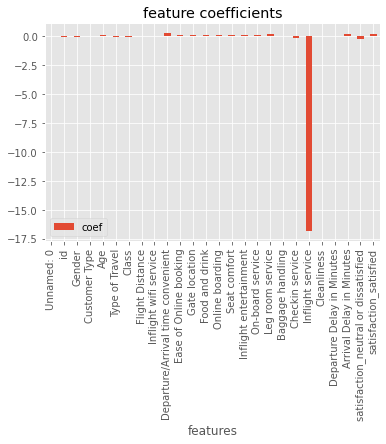

In [ ]:
#performance on validation data
outcome_pred=logistic.predict(X_validation)
#print(outcome_pred)
confusion_matrix(Y_validation,outcome_pred)
from sklearn.metrics import mean_squared_error

print('Error = %.4f' % mean_squared_error(Y_validation, outcome_pred))

Error = 0.1357


In [ ]:
####--------testing our model on separate unseen test data-----------####



dataset_test = pd.read_csv('/content/Airline_test.csv') #select the test file
dataset_test.tail()

#cleaning
dataset_test = pd.get_dummies(dataset_test, columns=['Gender','Type of Travel','Class','Customer Type','satisfaction'])
dataset_test['Arrival Delay in Minutes'] = dataset_test['Arrival Delay in Minutes'].fillna(0)
dataset_test = dataset_test.replace(r'^\s*$', np.nan, regex=True)

dataset_test.head()
array2 = dataset_test.values
X_test = array2[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]]
Y_test_actual = array2[:,30]

In [ ]:
#predicting with final model
#choose the best parameters
logistic_final = LogisticRegression(C=10000, solver='sag',max_iter=500)
logistic_final.fit(X_train, Y_train).score(X_test,Y_test_actual)
print(logistic_final.coef_)

outcome_pred_final=logistic_final.predict(X_test)
#print(outcome_pred)

###---test dATA error and CM----
print('Error = %.4f' % mean_squared_error(Y_test_actual, outcome_pred_final))
cm=confusion_matrix(Y_test_actual,outcome_pred_final)
print(cm)

#Accuracy

from sklearn.metrics import accuracy_score
accuracy_score(Y_test_actual,outcome_pred_final, normalize=False)
print("accuracy:", accuracy_score)

[[-2.12204324e-02  1.65221027e-04  2.08682755e-01 -2.14329840e-01
  -3.48859264e-02 -2.05037087e-01 -1.69875690e-01  3.90821145e-01
   4.87644970e-02  2.44441355e-01  1.17946053e-01  8.71480176e-02
  -8.89679058e-02  8.45520946e-03 -1.16805082e-01  5.20507924e-03
   2.65725873e-03 -7.56752993e-03 -1.35551518e-01 -8.88734606e-02
   1.92372460e-01 -4.16797439e-01  3.05661215e-01 -4.58832302e-01
  -7.12538916e-02  1.96796809e-02 -2.44104660e-01]]
Error = 0.1774
[[12135  2438]
 [ 2170  9233]]
accuracy: <function accuracy_score at 0x7f4a634a6e60>


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



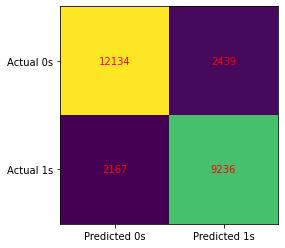

In [ ]:
#-------viz confusion matrix-----
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print(y_train)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
plt.rc('text', usetex=True)

array = dataset.values
A = array[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]]
B = array[:,30]

# Fit the data to a logistic regression model.
clf = sklearn.linear_model.LogisticRegression()
clf.fit(A, B)

# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -1, 2
ymin, ymax = -1, 2.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*A[B==0].T, s=8, alpha=0.5)
plt.scatter(*A[B==1].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()

In [ ]:
#ROC
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
import plotly
import plotly.express as px
fpr, tpr, thresholds = roc_curve(Y_test_actual, outcome_pred_final)
#PLOT ROC

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

#KNN

In [ ]:
####------------KNN-------------


scoring = 'accuracy'

#Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.
kfold = model_selection.KFold(n_splits=10)

knn_1= KNeighborsClassifier(n_neighbors= 5 )
knn_1.fit(X_train, Y_train)
#Predict test data set.
y_pred = knn_1.predict(X_validation)
#Checking performance our model with classification report.
print(classification_report(Y_validation, y_pred))

confusion_matrix(Y_validation,y_pred)
print('error = %.4f' % mean_squared_error(Y_validation, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78     11653
         1.0       0.73      0.68      0.70      9128

    accuracy                           0.75     20781
   macro avg       0.75      0.74      0.74     20781
weighted avg       0.75      0.75      0.75     20781

error = 0.2522


In [ ]:
# find best model by parameter tuning
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = [20,40,50]
n_neighbors = [1,3,7,20,50]
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)




In [ ]:
clf

In [ ]:
best_model = clf.fit(X_train,Y_train)


In [ ]:
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
#final best model
knn_final= KNeighborsClassifier(n_neighbors= 7, leaf_size= 20, p=1 )

knn_final.fit(X_train, Y_train)
#Predict test data set.
y_pred_final= knn_final.predict(X_validation)

#Checking performance our model
print(classification_report(Y_validation, y_pred_final))
confusion_matrix(Y_validation,y_pred_final)
print('error = %.4f' % mean_squared_error(Y_validation, y_pred_final))

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85     11653
         1.0       0.82      0.79      0.81      9128

    accuracy                           0.83     20781
   macro avg       0.83      0.83      0.83     20781
weighted avg       0.83      0.83      0.83     20781

error = 0.1651


In [ ]:
#predicting on unseen test data-----
#predict with the best knn model
Y_test_predict= knn_final.predict(X_test)
#Checking performance our model
print(classification_report(Y_test_actual, Y_test_predict))
cm_knn=confusion_matrix(Y_test_actual,Y_test_predict)
print('Error on separate test data = %.4f' % mean_squared_error(Y_test_actual, Y_test_predict))


              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85     14573
         1.0       0.82      0.78      0.80     11403

    accuracy                           0.83     25976
   macro avg       0.83      0.82      0.82     25976
weighted avg       0.83      0.83      0.83     25976

Error on separate test data = 0.1729


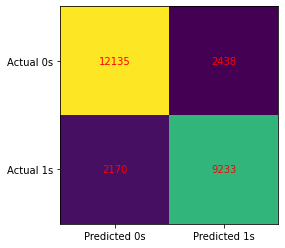

In [ ]:
#-------viz confusion matrix-----
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm_knn)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
#ROC

fpr, tpr, thresholds = roc_curve(Y_test_actual,Y_test_predict)
#PLOT ROC

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

#PCA - Visualization

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Female', 'Gender_Male', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer']
# Separating out the features
x = dataset.loc[:, features].values
# Separating out the target
y = dataset.loc[:,['satisfaction_satisfied']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, dataset[['satisfaction_satisfied']]], axis = 1)


In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['satisfaction_satisfied'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
pca.explained_variance_ratio_

 SVM


In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)

In [ ]:
#import PCA
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [ ]:
##Fit PCA on training set
pca.fit(X_train)

In [ ]:
#Apply the mapping (transform) to both the training set and the test set.
X_train = pca.transform(X_train)
X_validation = pca.transform(X_validation)




#SVM

In [ ]:
from sklearn import svm

#Create a svm Classifier with linear kernel-------
svm1 = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
svm1.fit(X_train, Y_train)


In [ ]:
#Predict the response for test dataset
y_pred_svm = svm1.predict(X_test)
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(Y_validation, y_pred_svm))
# Model Precision
print("Precision:",metrics.precision_score(Y_validation, y_pred_svm))

# Model Recall
print("Recall:",metrics.recall_score(Y_validation, y_pred_svm))

#output=
#Accuracy: 0.8765218228189211
#Precision: 0.8831153666510976
#Recall: 0.8285495179666958

In [ ]:
#tuning hyperparameters for SVM-------------

#-----Polynomial kernel-----

#Create another svm Classifier
svm2 = svm.SVC(kernel='polynomial') # polynomial Kernel
#Train the model using the training sets
svm2.fit(X_train, Y_train)


In [ ]:

#Predict the response for validation dataset
y_pred_svm2 = svm2.predict(X_validation)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(Y_validation, y_pred_svm2))
# Model Precision
print("Precision:",metrics.precision_score(Y_validation, y_pred_svm2))

# Model Recall
print("Recall:",metrics.recall_score(Y_validation, y_pred_svm2))


#output=
#Accuracy: 0.9284442519609258
#Precision: 0.9304788732394366
#Recall: 0.9046888694127958

In [ ]:
#-------- rbf kernel------
#Create another svm Classifier
from sklearn import svm
svm3 = svm.SVC(kernel='rbf',C=100) # rbf Kernel #add c=10
#Train the model using the training sets
svm3.fit(X_train, Y_train)

SVC(C=100)

In [ ]:

#Predict the response for validation dataset
y_pred_svm3 = svm3.predict(X_validation)
# Model Accuracy
#print("Accuracy:",metrics.accuracy_score(Y_validation, y_pred_svm3))
# Model Precision
#print("Precision:",metrics.precision_score(Y_validation, y_pred_svm3))

# Model Recall
#print("Recall:",metrics.recall_score(Y_validation, y_pred_svm3))

#output=
#Accuracy: 0.9432173620133776
#Precision: 0.94501679731243
#Recall: 0.9245179666958808

NameError: ignored

In [ ]:
#predict on test data------ X_test, Y_test_actual
y_pred_svm3 = svm3.predict(X_test)


###---test dATA error and CM----
print('Error = %.4f' % mean_squared_error(Y_test_actual, y_pred_svm3))
cmSVM=confusion_matrix(Y_test_actual,y_pred_svm3)
print(cmSVM)

#Accuracy

from sklearn.metrics import accuracy_score
accuracy_score(Y_test_actual,y_pred_svm3, normalize=False)
print("accuracy:", accuracy_score)

Error = 0.1337
[[13322  1251]
 [ 2223  9180]]
accuracy: <function accuracy_score at 0x7f4a634a6e60>


In [ ]:
print('Error on separate test data = %.4f' % mean_squared_error(Y_test_actual, y_pred_svm3))

Error on separate test data = 0.1337


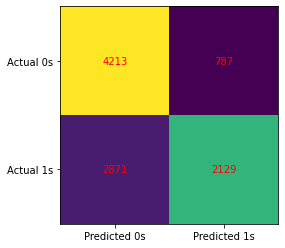

In [ ]:
#-------viz confusion matrix-----
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cmSVM)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
#ROC
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
import plotly
import plotly.express as px
fpr, tpr, thresholds = roc_curve(Y_test_actual,y_pred_svm3)
#PLOT ROC

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

# SVM method 2 - with scaled data and gridsearch cV


grid search CV-----

In [ ]:
# optimize the SVM with CV and grid search CV-----
param_grid= [
    {'C' : [0.5, 1, 10, 100],
     'gamma': ['scale', 1, 0.1, 0.001],
     'kernel':['linear', 'rbf']
    
}]

optimal_params= GridSearchCV ( SVC(), param_grid, cv=5, scoring='accuracy')

optimal_params.fit(X_train_scaled, Y_train)
print(optimal_params.best_params_)

#output-
# {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

Model interpretation with PCA-----

In [ ]:
#Model interpretation with PCA-----
pca= PCA()
X_train_pca = pca.fit_transform (X_train_scaled)

#calculate the percentage of variation each PC accounts for
per_var= np.round(pca.explained_variance_ratio_ *100, decimals=1)

#laels for plotting scree plot   
labels= ['PC'+ str(x) for x in range(1, len(per_var)+1)]  #one label for each PC

#plot it!!!

plt.bar(x=range(1, len(per_var)+1), height= per_var, tick_label=labels)
plt.ylabel ('Percentage of explained varance')
plt.xlabel('principal component')
plt.title('Scree plot')
plt.show()

#variance is not explained majoritarily by first 2,3,or 4 PCs. 

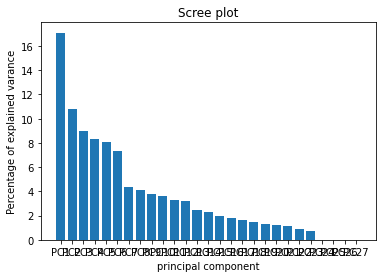

In [ ]:
#trying to visualiaze with the first 4 PCs



target_list = dataset.satisfaction_satisfied.tolist()

feature_scaled_pca_X0 = feature_scaled_pca[:, 0]
feature_scaled_pca_X1 = feature_scaled_pca[:, 1]
feature_scaled_pca_X2 = feature_scaled_pca[:, 2]
feature_scaled_pca_X3 = feature_scaled_pca[:, 3]

labels = target_list
colordict = {0:'brown', 1:'darkslategray'}
piclabel = {0:'not satisfied', 1:'satisfied'}
markers = {0:'o', 1:'*'}
alphas = {0:0.3, 1:0.4}

fig = plt.figure(figsize=(12, 7))
plt.subplot(1,2,1)
for l in np.unique(labels):
    ix = np.where(labels==l)
    plt.scatter(feature_scaled_pca_X0[ix], feature_scaled_pca_X1[ix], c=colordict[l], 
               label=piclabel[l], s=40, marker=markers[l], alpha=alphas[l])
plt.xlabel("First Principal Component", fontsize=15)
plt.ylabel("Second Principal Component", fontsize=15)

plt.legend(fontsize=15)

plt.subplot(1,2,2)
for l1 in np.unique(labels):
    ix1 = np.where(labels==l1)
    plt.scatter(feature_scaled_pca_X2[ix1], feature_scaled_pca_X3[ix1], c=colordict[l1], 
               label=piclabel[l1], s=40, marker=markers[l1], alpha=alphas[l1])
plt.xlabel("Third Principal Component", fontsize=15)
plt.ylabel("Fourth Principal Component", fontsize=15)

plt.legend(fontsize=15)

plt.show()




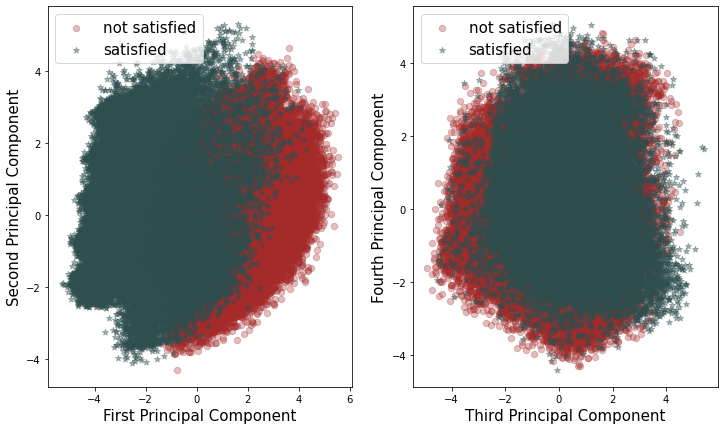

Feature Importance----

In [ ]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(svm2 , X_train_scaled, Y_train)

feature_names = X_encoded.columns.values.tolist()
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])

plt.xlabel("Permutation Importance")


#Output- 
#Inflight wifi service - highest
#Online borading - second highest
#Personal travle --similar--
#business travel


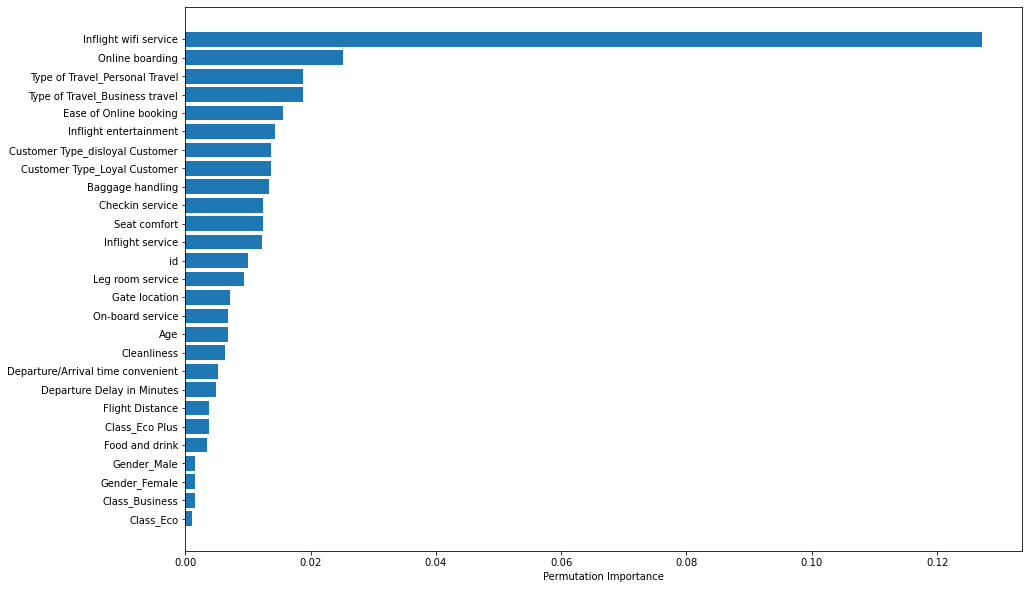

#Naive Bayes


In [ ]:
#X_train, X_validation, Y_train, Y_validation
#X_test,Y_test_actual
y_train= Y_train
y_test=Y_test_actual

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve



def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)

Accuracy = 0.8530388335498773
ROC Area under Curve = 0.8493767577088362
Time taken = 0.0872948169708252
              precision    recall  f1-score   support

         0.0    0.86133   0.87952   0.87033     11653
         1.0    0.84193   0.81924   0.83043      9128

    accuracy                        0.85304     20781
   macro avg    0.85163   0.84938   0.85038     20781
weighted avg    0.85281   0.85304   0.85280     20781



TypeError: ignored

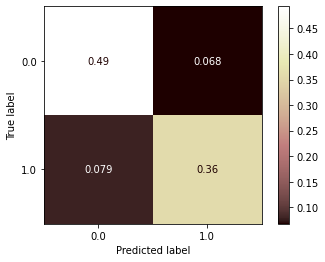

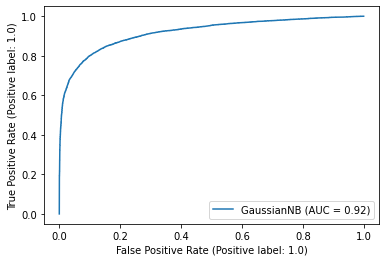

In [ ]:
#NaiveBayes
params_nb = {}
import time
model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, Y_train, X_validation, Y_validation)

In [ ]:
#HEATMAP 
dataframe.corr()[['satisfaction']].sort_values(by='satisfaction', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dataframe.corr()[['satisfaction']].sort_values(by='satisfaction', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Satisfaction', fontdict={'fontsize':18}, pad=16);

NameError: ignored